# Introduction au Reinforcement Learning 
# A - Quelques définitions

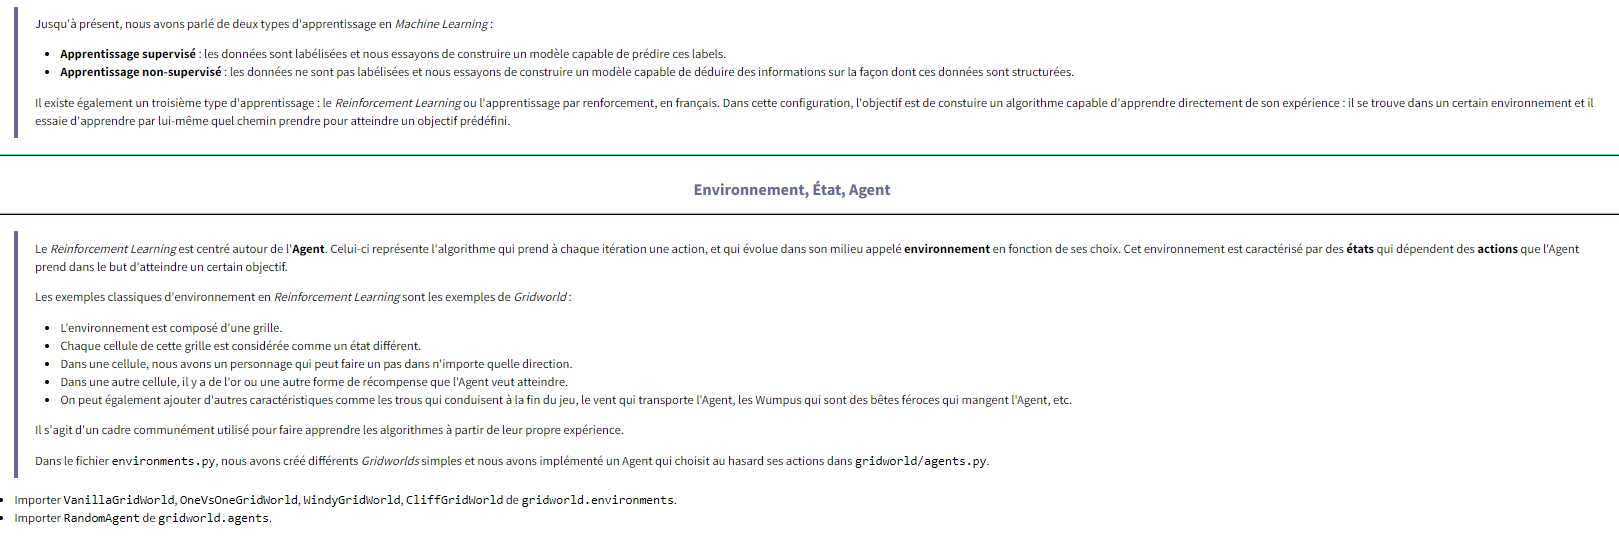

In [2]:
import gridworld

In [3]:
from gridworld.agents import RandomAgent
from gridworld.environments import VanillaGridWorld, OneVsOneGridWorld, WindyGridWorld, CliffGridWorld

ModuleNotFoundError: No module named 'gridworld.agents'

Instantier un Agent RandomAgent appelé agent1 avec comme argument prefix=vanilla.
Instantier un Agent RandomAgent appelé agent2 avec comme argument prefix=wumpus.
Instantier un Agent RandomAgent appelé agent3 avec comme argument prefix=windy.
Instantier un Agent RandomAgent appelé agent4 avec comme argument prefix=cliff.

In [ ]:
agent1 = RandomAgent(prefix='vanilla')
agent2 = RandomAgent(prefix='wumpus')
agent3 = RandomAgent(prefix='windy')
agent4 = RandomAgent(prefix='cliff')

Instantier chaque environnement avec l'Agent correspondant sous les noms vanilla_env, wumpus_env, windy_env et cliff_env.
Passer l'Agent comme argument agent au moment de l'instanciation des environnements.

In [ ]:
vanilla_env = VanillaGridWorld(agent=agent1)
wumpus_env = OneVsOneGridWorld(agent=agent2)
windy_env = WindyGridWorld(agent=agent3)
cliff_env = CliffGridWorld(agent=agent4)

Appliquer la méthode run_episode pour chacun des environnements que nous avons crées avec les paramètres par défaut.

In [ ]:
vanilla_env.run_episode()
wumpus_env.run_episode()
windy_env.run_episode()
cliff_env.run_episode()

In [ ]:
""" error chez eux !"

Pour visualiser ce qu'il s'est passé, vous pouvez utiliser les méthodes display_in_jupyter de la classe vanilla_env.

In [ ]:
vanilla_env.display_in_jupyter()

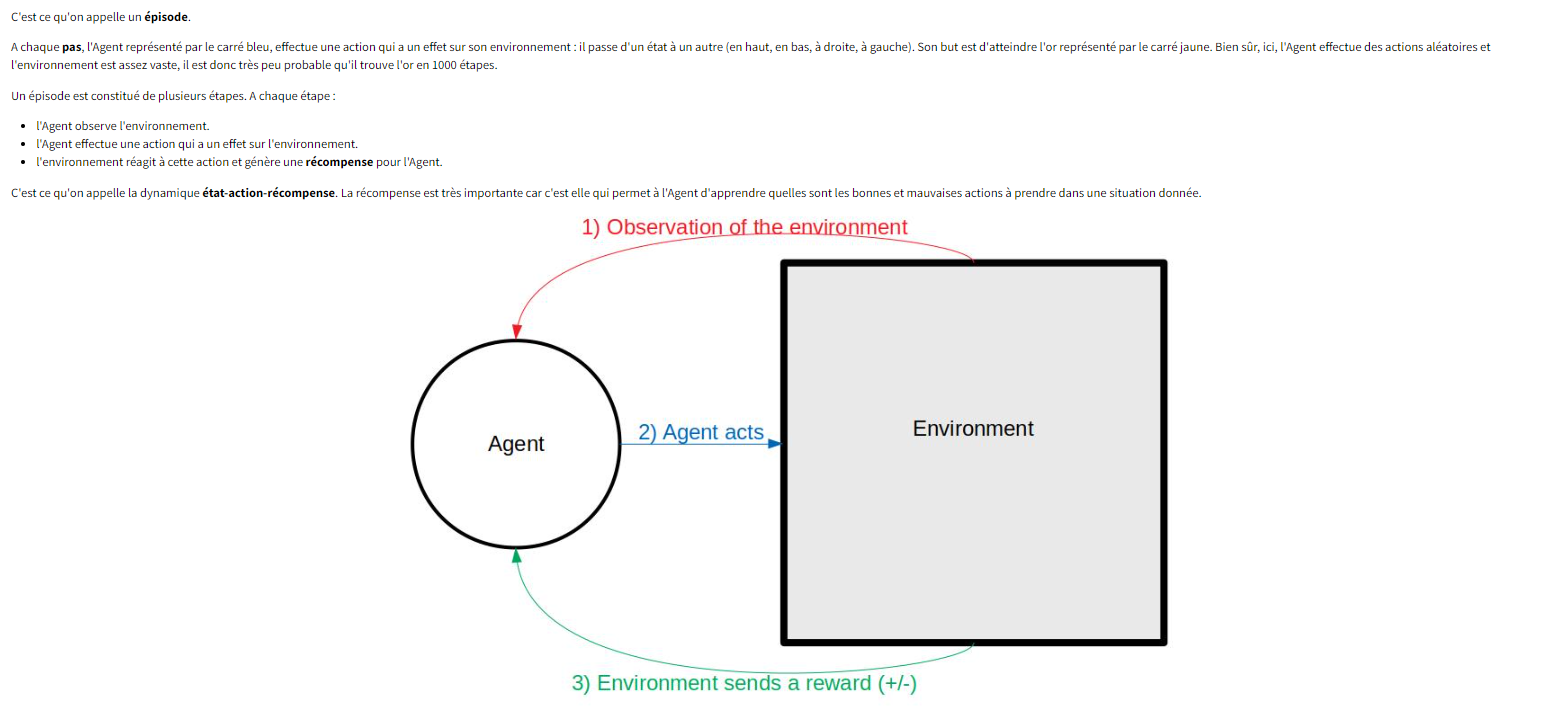

Afficher les épisodes de wumpus_env.

In [ ]:
wumpus_env.display_in_jupyter()

Ici, nous avons ajouté un Wumpus, representé comme un carré rouge se déplaçant de manière aléatoire.

Afficher les épisodes de windy_env.

In [ ]:
windy_env.display_in_jupyter()

Ici, nous avons un environnement différent avec du vent : dans les zones grises, l'Agent est poussé par le vent.

Afficher les épisodes de cliff_env.

In [ ]:
cliff_env.display_in_jupyter()

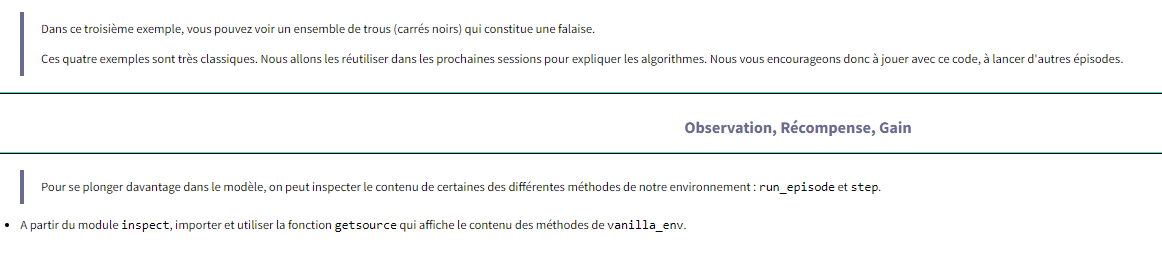

In [ ]:
from inspect import getsource

print(getsource(vanilla_env.run_episode))

print(getsource(vanilla_env.step))

Vous pouvez donc voir l'ordre dans lequel les différents éléments se réalisent au cours d'un épisode.

Maintenant, regardons le contenu d'un Agent.

Inspecter les méthodes observe et act de l'Agent agent1.
Afficher l'attribut set_of_actions.

In [ ]:
print(getsource(agent1.observe))

print(getsource(agent1.act))

print(agent1.set_of_actions)

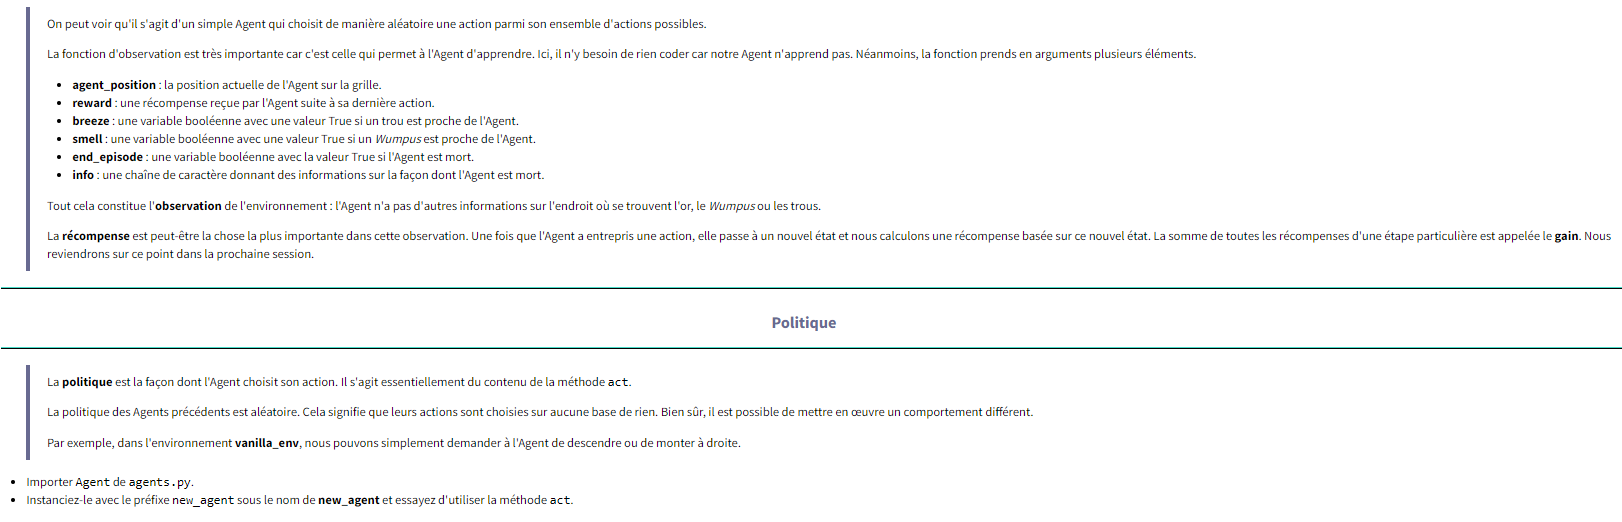

In [ ]:
from gridworld.agents import Agent
new_agent = Agent(prefix='new_agent')

# new_agent.act()

Cela soulève une erreur NotImplementedError, qui nous indique qu'il est nécessaire de définir une méthode act.

Importer numpy et définir une fonction nommée act qui ne prendra aucune entrée et retournera aléatoirement 'down' or 'right'.
Définir la méthode act de new_agent comme étant cette fonction et appelez-la.

In [ ]:
import numpy as np 
def act():
    return np.random.choice(['down', 'right'])

new_agent.act = act
new_agent.act()

In [ ]:
Instancier un environnement via VanillaGridWorld avec cet Agent, lancer un épisode et l'afficher.

In [ ]:
new_env = VanillaGridWorld(agent=new_agent)

new_env.run_episode()

new_env.display_in_jupyter()

Ce n'est bien sûr pas la meilleure politique à laquelle nous puissions penser, mais c'est quand même mieux qu'un choix totalement aléatoire. Il nous faut maintenant faire quelques calculs mathématiques.

# B - Les mathématiques derrière l'apprentissage par renforcement

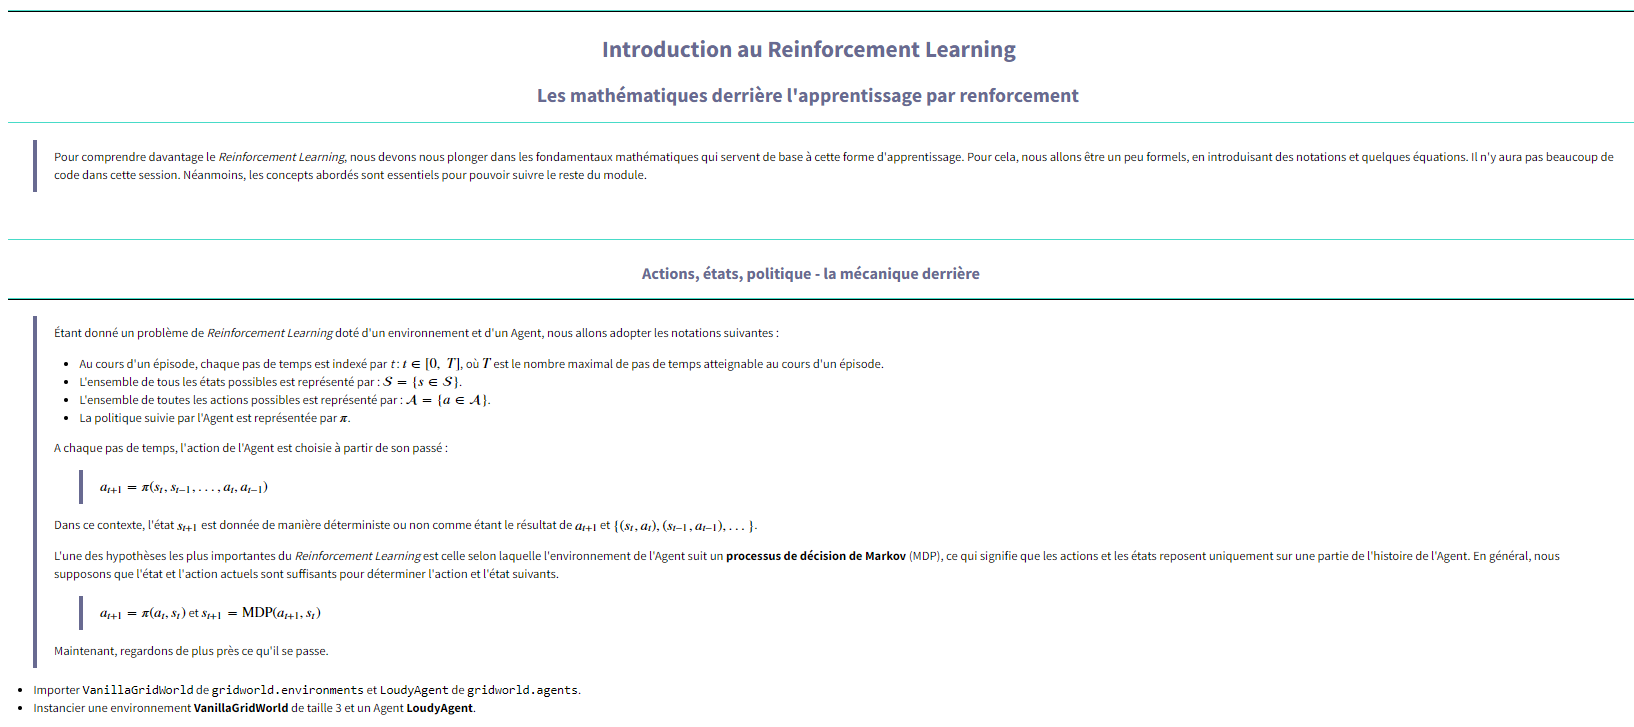

In [ ]:
from gridworld.agents import LoudyAgent
from gridworld.environments import VanillaGridWorld

agent = LoudyAgent()
env = VanillaGridWorld(agent=agent, grid_size=3)

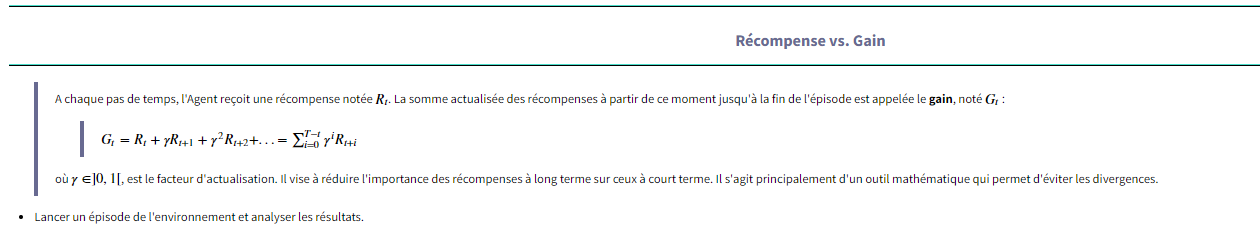

In [ ]:
env.run_episode()

In [ ]:
Visualiser une épisode via la méthode display_in_jupyter.

In [ ]:
env.display_in_jupyter()

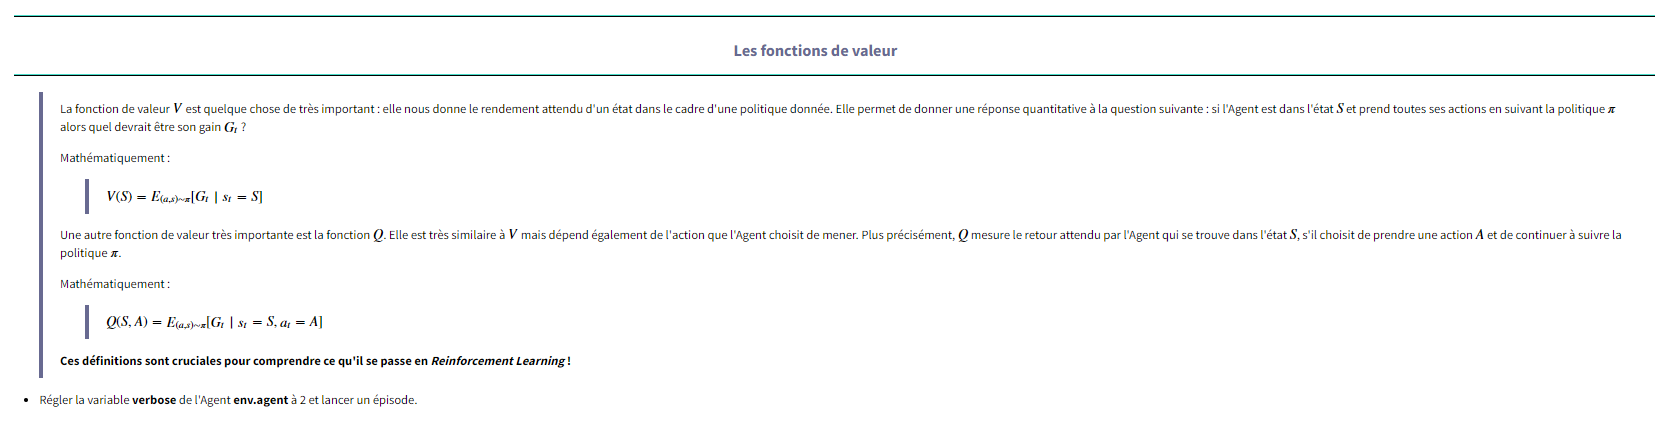

In [ ]:
env.agent.verbose = 2

env.run_episode()

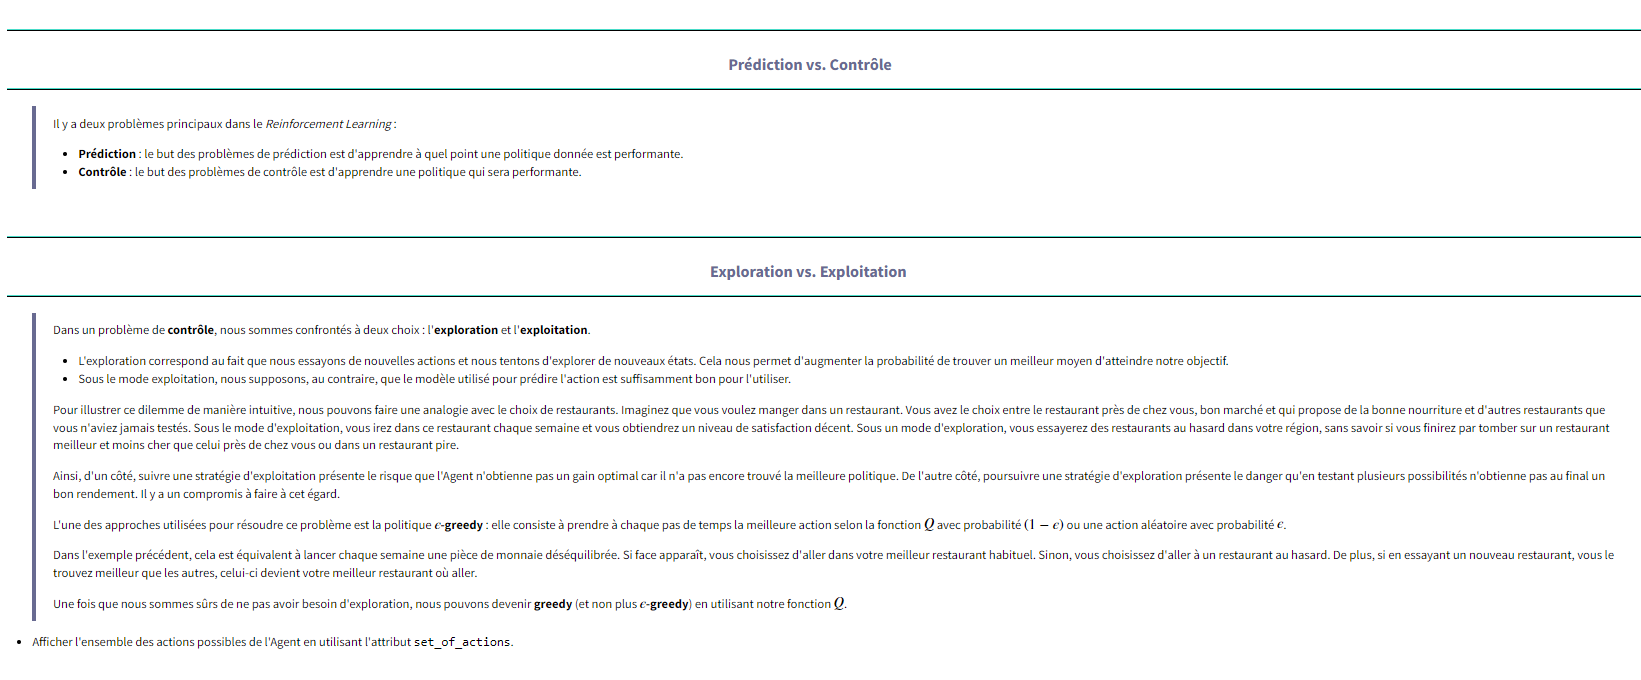

In [ ]:
print(agent.set_of_actions)

Créer une matrice optimal_Q de taille 3 x 3 x nombre_actions contenant 1 et 0 qui donnera la fonction  QQ  optimale greedy .

   Tip : rappelez-vous que la taille de la grille est de 3x3 et que vous commencez sur (0, 0). L'objectif est d'atteidre (2, 2). Vous devez utiliser numpy.

In [ ]:
import numpy as np
optimal_Q = np.zeros(shape=(3,3,4))
optimal_Q[0, 0, 1] = 1  # if in position (0, 0) go down
optimal_Q[1, 0, 1] = 1  # if in position (1, 0) go down
optimal_Q[2, 0, 2] = 1  # if in position (2, 0) go right
optimal_Q[2, 1, 2] = 1  # if in position (2, 1) go right

Fixer l'attribut Q de env.agent à optimal_Q.

In [ ]:
env.agent.Q = optimal_Q

Nous allons entrer en mode greedy.

Mettez env.agent.EPSILON à 0, puis lancez un épisode et affichez-le.

In [ ]:
env.agent.EPSILON = 0

env.run_episode(max_length=5)
env.display_in_jupyter()

In [ ]:
Maintenant que nous avons vu quelques notions de base, nous allons voir comment nous pouvons apprendre la fonction  𝑄𝑄 

# C - Monte Carlo Learning

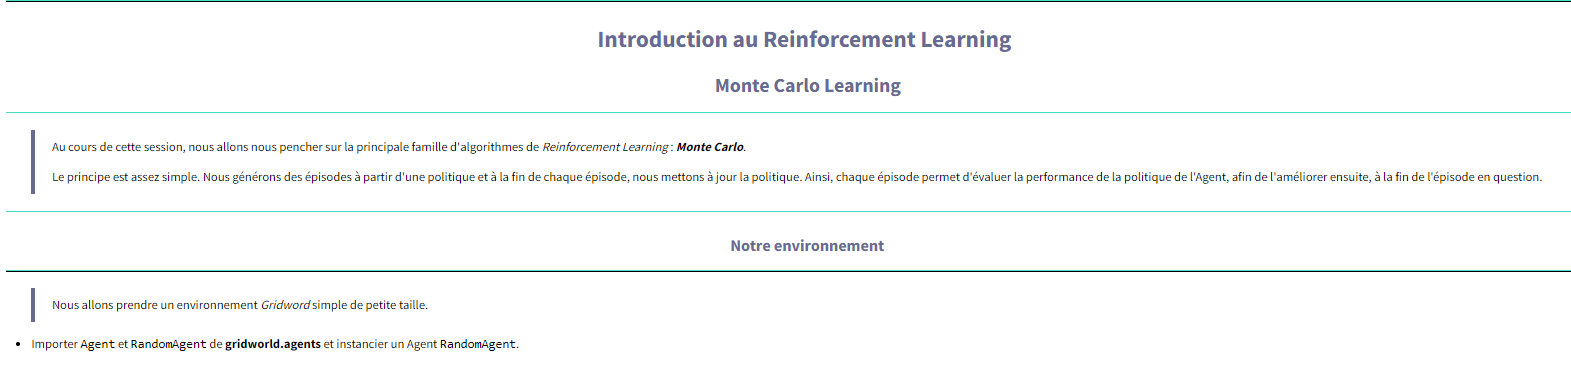

In [ ]:
from gridworld.agents import Agent, RandomAgent
random_agent = RandomAgent()

importer VanillaGridWorld de gridworlds/environments.py et l'instancier avec l'Agent.

In [ ]:
from gridworld.environments import VanillaGridWorld

env = VanillaGridWorld(agent=random_agent)

Lancer un épisode et visualiser le.

In [ ]:
env.run_episode()

env.display_in_jupyter()

Itération sur politique de Monte Carlo

Le premier algorithme que nous allons étudier est appelé est Itération sur politique de Monte Carlo.

Exécuter la cellule de code suivante pour afficher correctement le pseudo-code de l'algorithme.

In [4]:
from IPython.display import HTML
HTML('''<style>
    .pseudo-code-indent {
    margin-left:20px;
    border-left-width: 5px;
    border-left-style: solid;
    border-left-color: #75DFC1;
    padding-left:10px;
    margin-bottom: 10px;
    font-size: 15px;
    font-family: times;
    }
   .pseudo-code-container {
    margin:20px;
    padding:20px;
    border-width:5px;
    border-radius:5px;
    border-color:#40c6a0;
    border-style: solid;
    }
    
</style>''')

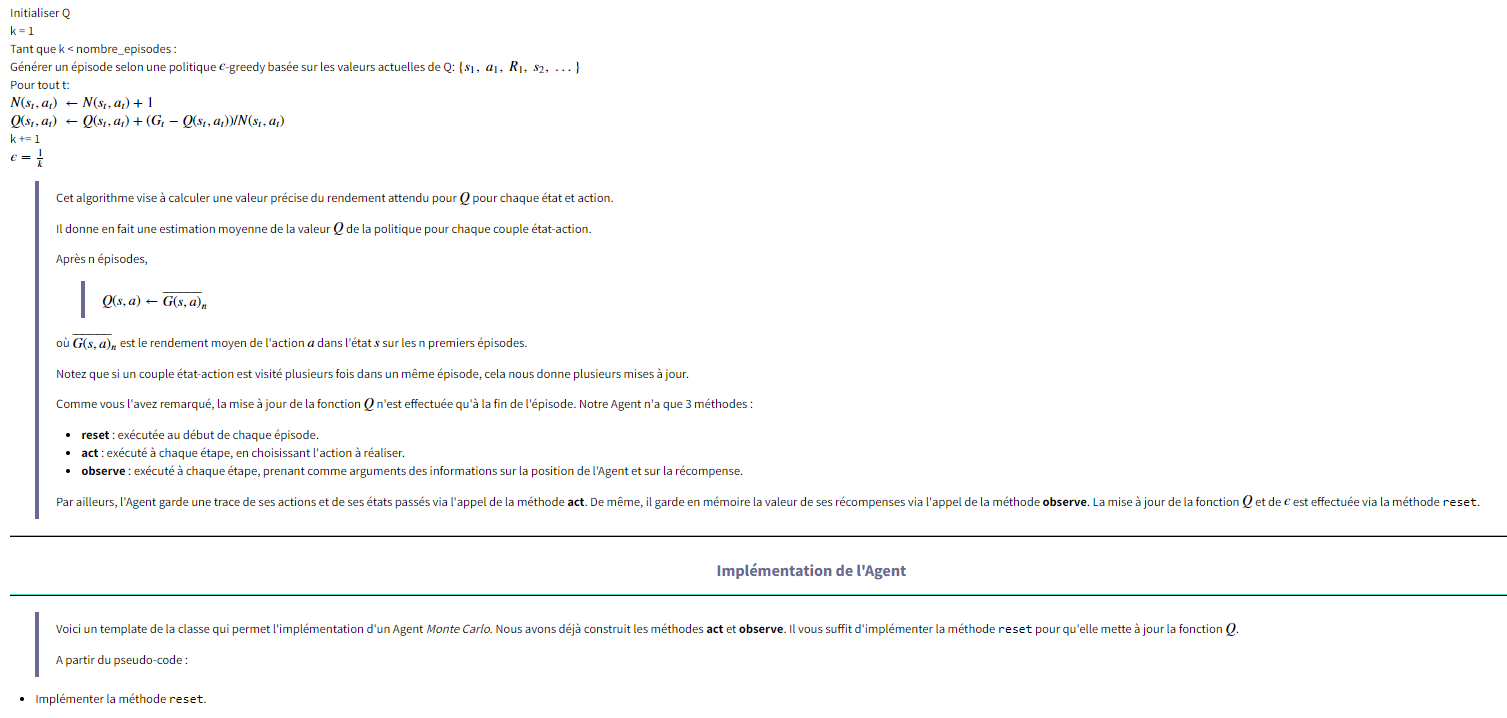

In [6]:
import numpy as np


class MonteCarloAgent(Agent):
    def __init__(self, prefix='MC_GLIE', grid_size=(5, 5)):
        
        # préfixe pour nommer les vidéos
        self.prefix = prefix 
        
        # définition de l'ensemble d'actions
        self.set_of_actions = ['up', 'down', 'left', 'right']
        
        # valeur d'epsilon pour la politique epsilon-greedy
        self.EPSILON = 1.
        
        # facteur d'actualisation
        self.GAMMA = .8
        
        # initialisation de la matrice Q
        self.Q_function = np.random.uniform(size=(grid_size[0], grid_size[1], len(self.set_of_actions)))
        
        # création d'une matrice N
        self.N = np.zeros(shape=(grid_size[0], grid_size[1], len(self.set_of_actions)))
        
        # initialisation de la position
        self.position = (0, 0)
        
        # listes pour garder une trace des actions, états et récompenses 
        # dans l'ordre chronologique
        self.actions = []
        self.states = []
        self.rewards = []
        
        # initialisation du compteur d'épisodes
        self.episode = 0
        
        pass
    
    def act(self):
        # ajout de la position actuelle à l'historique des positions
        self.states.append(self.position)
        
        # choix de l'action selon la politique epsilon-greedy
        if np.random.uniform() < self.EPSILON:
            action = np.random.choice(self.set_of_actions)
        else : 
            action = self.set_of_actions[np.argmax(self.Q_function[self.position[0], self.position[1]])]
        
        # ajout de l'action actuelle à l'historique des actions
        self.actions.append(action)
        
        return action
    
    def observe(self, agent_position, reward, breeze, smell, end_episode, info): 
        # ajouter de la récompense à l'historique des récompenses
        self.rewards.append(reward)

        # mise à jour de la position actuelle
        self.position = agent_position
        
        pass
    
    def reset(self):
        
        # incrémentation du nombre d'épisodes
        self.episode += 1
       
        # calcul des rendements
        rewards = np.array(self.rewards)
        episode_len = len(rewards)
        gammas = np.array([self.GAMMA**i for i in range(episode_len)])
        
        returns = [np.dot(rewards[i:],gammas[0:episode_len-i]) for i in range(episode_len)]

        # calcul et mise à jour des variables Q et N
        for index, (pos1, pos2) in enumerate(self.states):
            return_ = returns[index]
            action = self.set_of_actions.index(self.actions[index])
            
            # updating N
            self.N[pos1, pos2, action] +=1
            # updating Q
            self.Q_function[pos1, pos2, action] = self.Q_function[pos1, pos2, action] + 1/self.N[pos1, pos2, action]*(return_ - self.Q_function[pos1, pos2, action])
            
        
        # mise à jour d'epsilon
        self.EPSILON = 1/ self.episode
        
        # ré-initialisation des historiques
        self.states = []
        self.actions = []
        self.rewards = []
                             
        pass

NameError: name 'Agent' is not defined

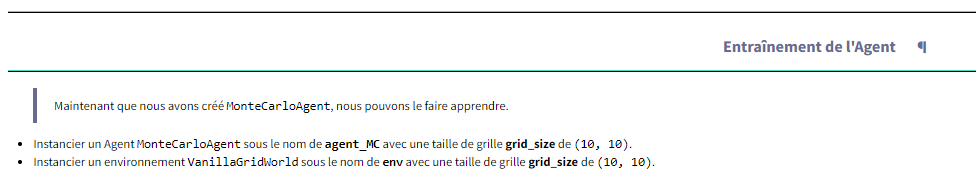

In [5]:
agent_MC = MonteCarloAgent(prefix='MC', grid_size=(10, 10))
env = VanillaGridWorld(agent=agent_MC, grid_size=10)

NameError: name 'MonteCarloAgent' is not defined

Exécuter un épisode et le visualiser en utilisant la méthode display_in_jupyter avec l'argument episode_number fixé à 1.

In [ ]:
env.run_episode()
env.display_in_jupyter(episode_number=1)

A l'aide d'une boucle, lancer 5000 épisodes avec l'argument write fixé à Fals

In [ ]:
for i in range(5000):
    env.run_episode(write=False)

Résultats

Afficher la valeur de EPSILON qui est un attribut de l'Agent dans son environnement.

In [ ]:
print(env.agent.EPSILON)

Appeler la méthode display_greedy_episode de env: cela revint à fixer temporairement  ϵϵ  à 0 et donc à lancer un épisode avec une politique greedy et l'afficher.

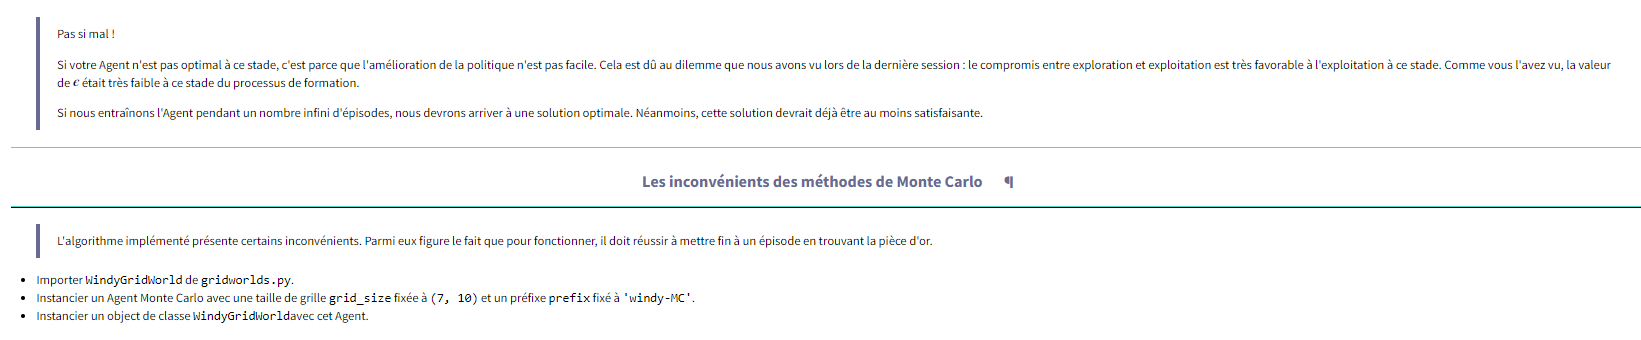

In [ ]:
from gridworld.environments import WindyGridWorld
agent = MonteCarloAgent(prefix='windy-MC', grid_size=(7, 10))
env = WindyGridWorld(agent=agent)

Exécuter un épisode et visualiser le.

Pour un rendu optimal, les paramètres de display_in_jupyter sont width=500, height=350 pour cet environnement.

In [ ]:

env.run_episode()
env.display_in_jupyter()

Lancer 1000 épisodes de l'environnement avec l'argument write fixé à False.

In [ ]:
for i in range(1000):
    env.run_episode(write=False)

Maintenant, nous allons visualiser les performances de l'Agent après la phase d'entraînement.

Appeler la méthode display_greedy_episode de l'environnement.

In [ ]:
env.display_greedy_episode()

Parce que l'Agent de Monte Carlo ne met à jour sa fonction  QQ  qu'à la fin d'un épisode, il ne peut s'améliorer que si il atteint le but au cours de l'épisode. Il s'agit de la principale limite des méthodes de Monte Carlo.

Nous verrons que certains autres algorithmes sont plus efficaces avec ce genre de problème.

# D - Temporal Difference Learning : SARSA

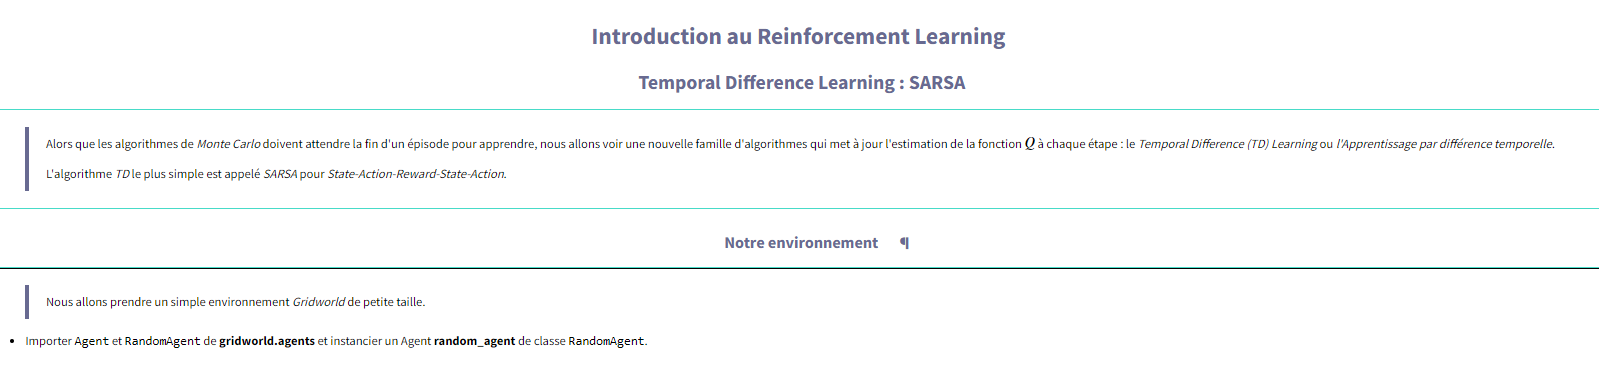

In [ ]:
from gridworld.agents import Agent, RandomAgent

random_agent = RandomAgent()

Importer VanillaGridWorld de gridworld.environments et instancier env avec l'Agent précédent.

In [ ]:
from gridworld.environments import VanillaGridWorld

env = VanillaGridWorld(agent=random_agent)

Lancer un épisode et visualiser le.

In [ ]:
env.run_episode()

env.display_in_jupyter()

In [ ]:
SARSA 

In [7]:
from IPython.display import HTML
HTML('''<style>
    .pseudo-code-indent {
    margin-left:20px;
    border-left-width: 5px;
    border-left-style: solid;
    border-left-color: #75DFC1;
    padding-left:10px;
    margin-bottom: 10px;
    font-size: 15px;
    }
   .pseudo-code-container {
    margin:20px;
    padding:20px;
    border-width:5px;
    border-radius:5px;
    border-color:#40c6a0;
    border-style: solid;
    font-family: times;
    }
    
</style>''')

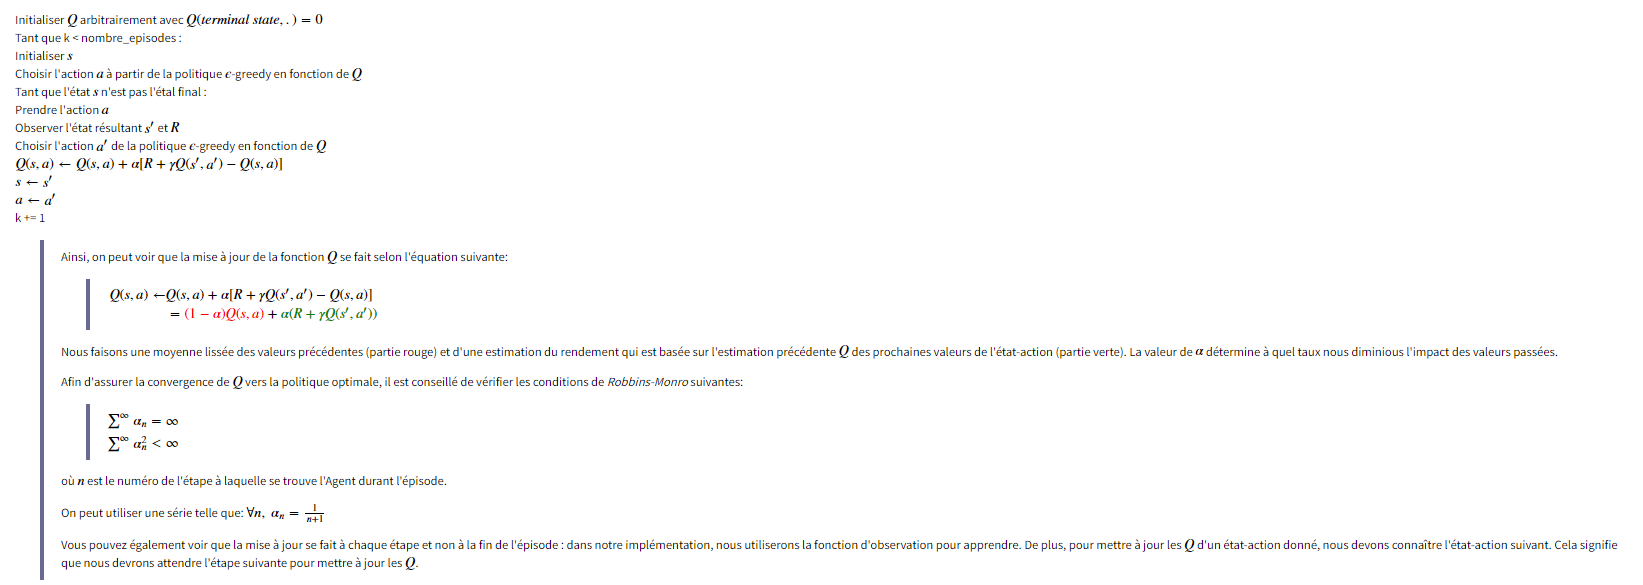

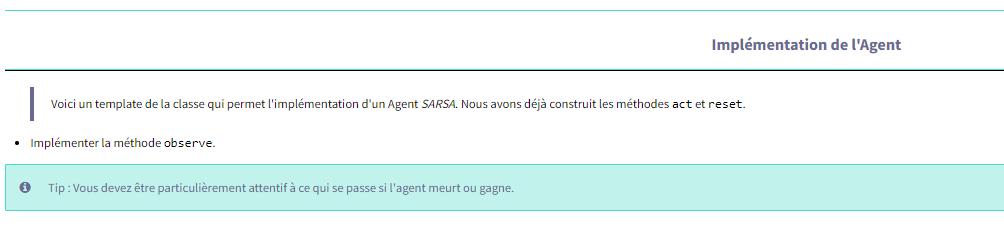

In [ ]:
class SarsaAgent(Agent):
    def __init__(self, prefix='SARSA', grid_size=(7,10), starting_position=(3, 0), gold_position = (3,7), epsilon=0.5, gamma=.8, holes_positions=[]):

        # préfixe pour nommer les vidéos
        self.prefix = prefix

        # définition de l'ensemble d'actions
        self.set_of_actions = ['up', 'down', 'right', 'left']
        self.number_of_actions = len(self.set_of_actions)

        # position de départ
        self.starting_position = starting_position

        # initialisation de la matrice Q
        self.Q_function = np.random.uniform(size=(grid_size[0], grid_size[1], self.number_of_actions))

        # attribution d'une valeur nulle pour la valeur Q 
        ## de l'état terminal en raison de la pièce d'or
        self.Q_function[gold_position[0], gold_position[1]] = 0
        ## de l'état terminal en raison des trous
        for hole in holes_positions:
            self.Q_function[hole[0], hole[1]] = 0

        # paramètres SARSA
        self.ALPHA = 1
        self.GAMMA = gamma
        self.EPSILON = epsilon

        # paramètres d'apprentissage 
        ## actions
        self.current_action = None
        self.previous_action = None
        ## récompenses
        self.current_reward = None
        self.previous_reward = None
        ## positions
        self.current_position = self.starting_position
        self.previous_position = None
        
        # initialisation du compteur d'épisodes
        self.step_number = 0

        pass

    def act(self):
        """
        renvoie une action parmi l'ensemble des actions possibles 
            - suit une politique d'epsilon-greedy 
            - met à jour les paramètres de l'action en cours et de l'action précédente
        """
        
        # mise à jour de l'action précédente
        self.previous_action = self.current_action

        # choix de l'action basée sur une politique epsilon-greedy 
        if np.random.uniform() < self.EPSILON:
            action = np.random.choice(self.set_of_actions)
        else:
            action_index = np.argmax(self.Q_function[self.current_position[0], self.current_position[1]])
            action = self.set_of_actions[action_index]
    
        # mise à jour d'action actuelle
        self.current_action = action
        
        # augmentation du compteur 
        self.step_number+=1
        
        # mise à jour de alpha
        self.ALPHA = 1/self.step_number
      
        return action

    def observe(self, agent_position, reward, breeze, smell, end_episode, info):
        
        # obtention de l'indice A'
        current_action_index = self.set_of_actions.index(self.current_action)

        if self.previous_action is not None:

            # obtention de l'indice A
            previous_action_index = self.set_of_actions.index(self.previous_action)
            
            # obtention de Q(S,A)
            q_s_a = self.Q_function[self.previous_position[0], self.previous_position[1], previous_action_index]
            # obtention de Q(S',A')
            q_sp_ap = self.Q_function[self.current_position[0], self.current_position[1], current_action_index]
            
            # calcul de la mise à jour
            update = (1-self.ALPHA)*q_s_a + self.ALPHA*(self.current_reward + self.GAMMA* q_sp_ap)
            
            self.Q_function[self.previous_position[0], self.previous_position[1], previous_action_index] = update

            
        # mise à jour des valeurs  
        # de la position précédente
        self.previous_position = self.current_position
        # de la position en cours
        self.current_position = agent_position
        # de la récompense précédente
        self.previous_reward = self.current_reward
        # de la récompense en cours
        self.current_reward = reward
        
        # mise à jour si l'épisode se termine
        if end_episode: 
            
            self.Q_function[self.previous_position[0], self.previous_position[1], current_action_index] = \
            (1-self.ALPHA)*self.Q_function[self.previous_position[0], self.previous_position[1], current_action_index] +\
            self.ALPHA * reward
        
        pass

    def reset(self):
        self.previous_action = None
        self.previous_reward = None
        self.previous_position = None
        self.current_action = None
        self.current_reward = None
        self.current_position = self.starting_position
        self.step_number = 1
        pass

instancier un Agent SarsaAgent avec une taille de grille de (10, 10), une position initiale starting_position de (0, 0) et la position de la pièce d'or fixée à (9, 9).
Initialiser un environnementVanillaGridWorld avec cet Agent.

In [ ]:
agent = SarsaAgent(prefix='sarsa', grid_size=(10, 10), starting_position=(0, 0), gold_position=(9, 9))
env = VanillaGridWorld(agent=agent)

Lancer 1000 épisode avec l'argument write fixé à False.

In [ ]:
for i in range(1000):
     env.run_episode(write=False)

Résultats 

Appeler la méthode display_greedy_episode de l'environnement.

In [ ]:
env.display_greedy_episode()

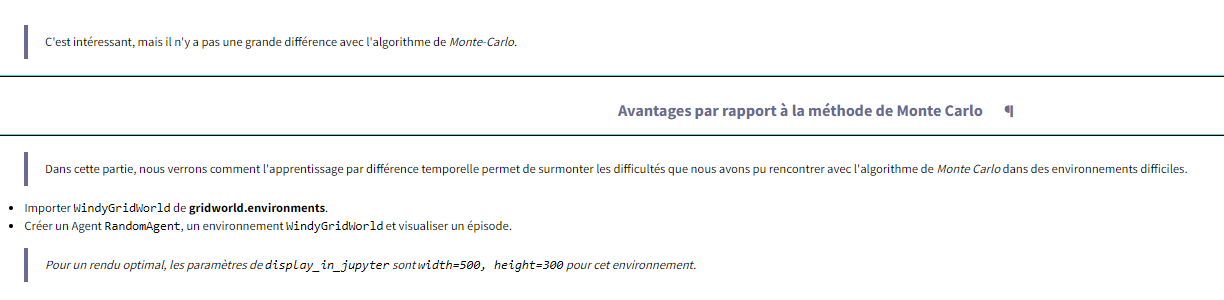

In [ ]:
from gridworld.environments import WindyGridWorld
windy_env = WindyGridWorld(agent=RandomAgent())

windy_env.run_episode()
windy_env.display_in_jupyter(width=500, height=300)

Pour rappel, les zones grises sont les zones où le vent pousse notre Agent vers le haut.

Vous pouvez voir que l'Agent random a beaucoup de mal à trouver l'or car il n'y a pas beaucoup de chemins qui permettent d'atteindre l'or. L'Agent Monte Carlo est essentiellement un Agent aléatoire pendant son premier épisode et il s'améliorera si et seulement s'il atteint le but. Dans ce cas, il est donc peu probable qu'il trouve un jour l'or et qu'il s'améliore.

Créer un Agent SarsaAgent et initialiser un environnement WindyGridWorld avec cet Agent.

In [ ]:
agent = SarsaAgent(prefix='sarsa-windy', epsilon=.5)
env = WindyGridWorld(agent=agent)

Entraîner l'Agent durant 1000 épisodes avec l'argument write fixé à False.

In [ ]:
for i in range(1000):
    env.run_episode(write=False)

Appeler la méthode display_greedy_episode avec cet environnement.

In [ ]:
env.display_greedy_episode()

Vous pouvez maintenant voir la différence avec l'Agent de Monte Carlo du module précédent et donc l'avantage de l'apprentissage TD par rapport aux méthodes de Monte Carlo.

# E - Temporal Difference Learning : Q-Learning

Jusqu'à présent, nous avons vu les avantages de l'apprentissage TD par rapport à Monte Carlo avec l'algorithme SARSA. Un autre algorithme basé sur l'apprentissage TD est le Q-learning. Au début, il semble très similaire à l'algorithme SARSA, mais nous verrons qu'ils diffèrent sur un point très important.

Notre environnement 
Nous allons prendre un simple environnement Gridworld de petite taille.

Importer Agent et RandomAgent de gridworld.agents et instancier un Agent RandomAgent sous le nom random_agent.

In [ ]:
from gridworld.agents import Agent, RandomAgent

In [ ]:
random_agent = RandomAgent()

Importer VanillaGridWorld de gridworld.environments et instancier env avec l'Agent précédent.

In [ ]:
from gridworld.environments import VanillaGridWorld

env = VanillaGridWorld(agent=random_agent)

Lancer un épisode et visualiser le.

In [ ]:
env.run_episode()

env.display_in_jupyter()

Q-learning  

Le premier algorithme que nous allons voir est appelé Q-Learning.

In [ ]:
from IPython.display import HTML
HTML('''<style>
    .pseudo-code-indent {
    margin-left:20px;
    border-left-width: 5px;
    border-left-style: solid;
    border-left-color: #75DFC1;
    padding-left:10px;
    margin-bottom: 10px;
    font-size: 15px;
    font-family: times;
    }
   .pseudo-code-container {
    margin:20px;
    padding:20px;
    border-width:5px;
    border-radius:5px;
    border-color:#40c6a0;
    border-style: solid;
    font-size: 15px;
    font-family: times;
    }
    
</style>''')

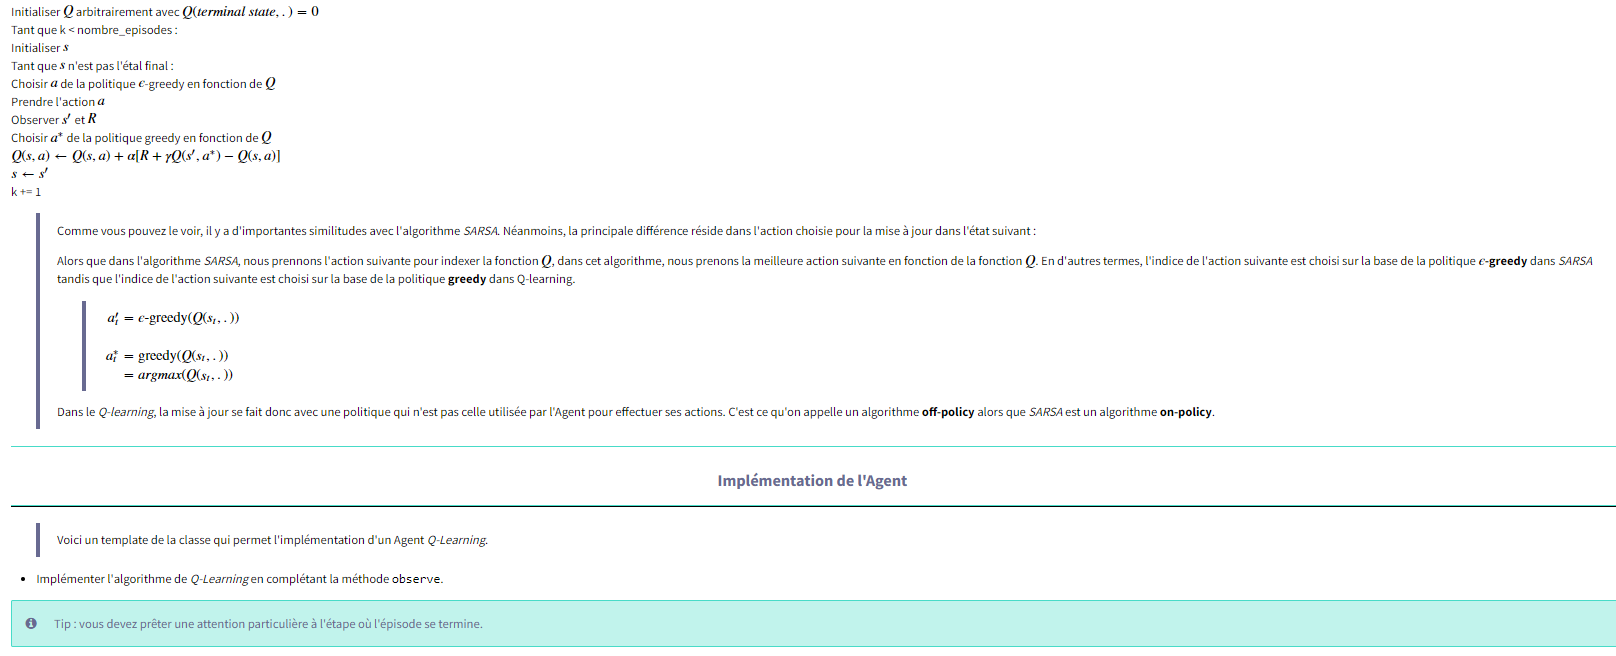

In [ ]:
class QAgent(Agent):
    def __init__(self, prefix='QAgent', grid_size=(7,10), starting_position=(3, 0), gold_position = (3,7), epsilon=0.5, gamma=.8, holes_positions=[]):

        # préfixe pour nommer les vidéos
        self.prefix = prefix

        # définition de l'ensemble d'actions
        self.set_of_actions = ['up', 'down', 'right', 'left']
        self.number_of_actions = len(self.set_of_actions)

        # position de départ
        self.starting_position = starting_position

        # initialisation de la matrice Q
        self.Q_function = np.random.uniform(size=(grid_size[0], grid_size[1], self.number_of_actions))

        # attribution d'une valeur nulle pour la valeur Q 
        ## de l'état terminal en raison de la pièce d'or
        self.Q_function[gold_position[0], gold_position[1]] = 0
        ## de l'état terminal en raison des trous
        for hole in holes_positions:
            self.Q_function[hole[0], hole[1]] = 0

        # paramètres Q-learning
        self.ALPHA = 1
        self.GAMMA = gamma
        self.EPSILON = epsilon

        # paramètres d'apprentissage 
        ## actions
        self.current_action = None
        self.previous_action = None
        ## récompenses
        self.current_reward = None
        self.previous_reward = None
        ## positions
        self.current_position = self.starting_position
        self.previous_position = None
        
        # initialisation du compteur d'épisodes
        self.step_number = 0

        pass

    def act(self):
        """
        renvoie une action parmi l'ensemble des actions possibles 
            - suit une politique d'epsilon-greedy 
            - met à jour les paramètres de l'action en cours et de l'action précédente
        """
        
        # mise à jour de l'action précédente
        self.previous_action = self.current_action

        # choix de l'action basée sur une politique epsilon-greedy 
        if np.random.uniform() < self.EPSILON:
            action = np.random.choice(self.set_of_actions)
        else:
            action_index = np.argmax(self.Q_function[self.current_position[0], self.current_position[1]])
            action = self.set_of_actions[action_index]
    
        # mise à jour d'action actuelle
        self.current_action = action
        
        # augmentation du compteur 
        self.step_number += 1
        
        # mise à jour de alpha
        self.ALPHA = 1/self.step_number
      
        return action

    def observe(self, agent_position, reward, breeze, smell, end_episode, info):
        # obtention de l'indice A'
        current_action_index = self.set_of_actions.index(self.current_action)
        
        if self.previous_action is not None:

            # obtention de l'indice A
            previous_action_index = self.set_of_actions.index(self.previous_action)
            # obtention de l'indice A*
            best_action_index = np.argmax(self.Q_function[self.current_position[0], self.current_position[1]])
            
            # obtention de Q(S,A)
            q_s_a = self.Q_function[self.previous_position[0], self.previous_position[1], previous_action_index]
            # obtention de Q(S',A*)
            q_sp_as = self.Q_function[self.current_position[0], self.current_position[1], best_action_index]
            
            # calcul de la mise à jour
            update = (1-self.ALPHA)*q_s_a + self.ALPHA*(self.current_reward + self.GAMMA* q_sp_as)
            
            self.Q_function[self.previous_position[0], self.previous_position[1], previous_action_index] = update
            
        # mise à jour des valeurs  
        # de la position précédente
        self.previous_position = self.current_position
        # de la position en cours
        self.current_position = agent_position
        # de la récompense précédente
        self.previous_reward = self.current_reward
        # de la récompense en cours
        self.current_reward = reward
        
        # mise à jour si l'épisode se termine
        if end_episode: 
            
            self.Q_function[self.previous_position[0], self.previous_position[1], current_action_index] = \
            (1-self.ALPHA)*self.Q_function[self.previous_position[0], self.previous_position[1], current_action_index] +\
            self.ALPHA * reward
        
        pass

    def reset(self):
        self.previous_action = None
        self.previous_reward = None
        self.previous_position = None
        self.current_action = None
        self.current_reward = None
        self.current_position = self.starting_position
        self.step_number = 1
        pass

Instancier un Agent de classe QAgent avec une taille de grille grid_size de (10,10), une position initiale starting_position de (0, 0) et la position de la pièce d'or fixée à (9, 9).
Initialiser un environnementVanillaGridWorld avec cet Agent.

In [ ]:
agent = QAgent(grid_size=(10, 10), starting_position=(0, 0), gold_position=(9, 9))
env = VanillaGridWorld(agent=agent, grid_size=10)

Lancer 1000 épisode avec l'argument write fixé à False.

In [ ]:
for i in range(1000):
    env.run_episode(write=False)

Résultats 

Appeler la méthode display_greedy_episode de l'environnement.

In [ ]:
env.display_greedy_episode()

On observe que l'Agent est capable d'apprendre quel chemin prendre afin d'atteindre son but. Néanmoins, la différence avec l'Agent SARSA n'est pas claire.

Différence avec SARSA 

Importer CliffGridWorld de gridworld.environments, lancer et visualiser un épisode avec un Agent ramdom de classe RandomAgent.
Pour un rendu optimal, les paramètres de display_in_jupyter sont width=600, height=200 pour cet environnement.

In [ ]:
from gridworld.environments import CliffGridWorld

env = CliffGridWorld(agent=RandomAgent())

env.run_episode()
env.display_in_jupyter(width=600, height=200)

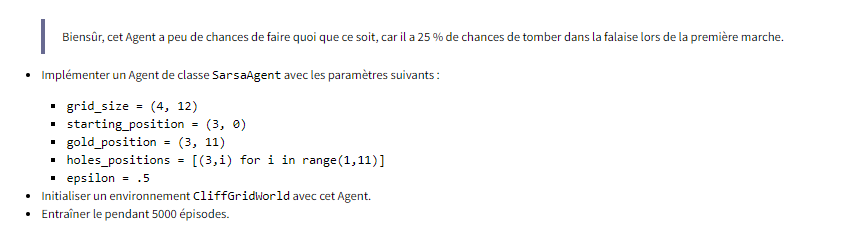

In [ ]:
from gridworld.agents import SarsaAgent
env_sarsa = CliffGridWorld(agent=SarsaAgent(grid_size=(4, 12),
                                            starting_position=(3, 0),
                                            gold_position=(3, 11),
                                            epsilon = .1, 
                                            holes_positions = [(3,i) for i in range(1,11)]
                                        ))


for i in range(5000):
    env_sarsa.run_episode(write=False)

Appeler la méthode display_greedy_episode de l'environnement.

In [ ]:
env_sarsa.display_greedy_episode()

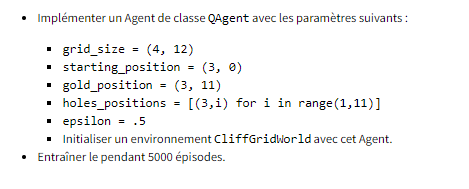

In [ ]:
env_q = CliffGridWorld(agent=QAgent(grid_size=(4, 12),
                                            starting_position=(3, 0),
                                            gold_position=(3, 11),
                                            epsilon = .5, 
                                            holes_positions = [(3,i) for i in range(1,11)]
                                        ))


for i in range(5000):
    env_q.run_episode(write=False)

Appeler la méthode display_greedy_episode de l'environnemen

In [ ]:
env_q.display_greedy_episode()

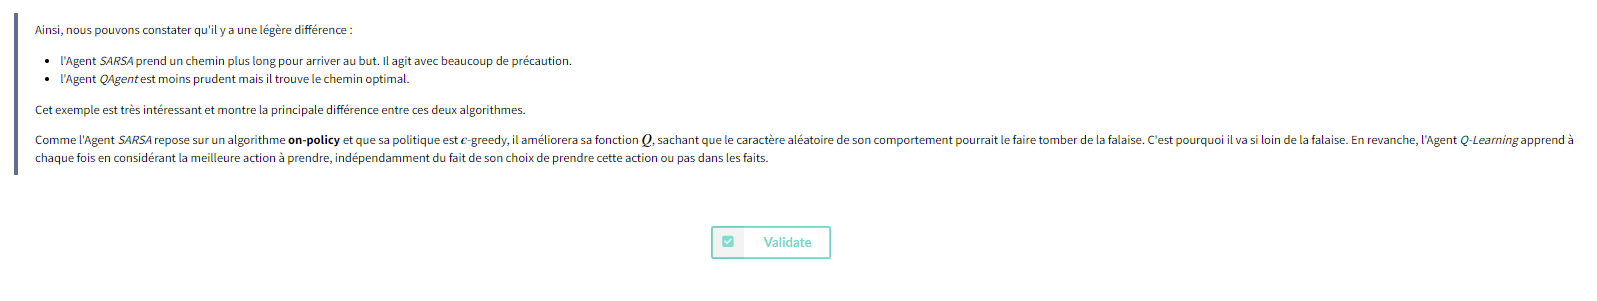

# F - MC + TD = TD( λ )

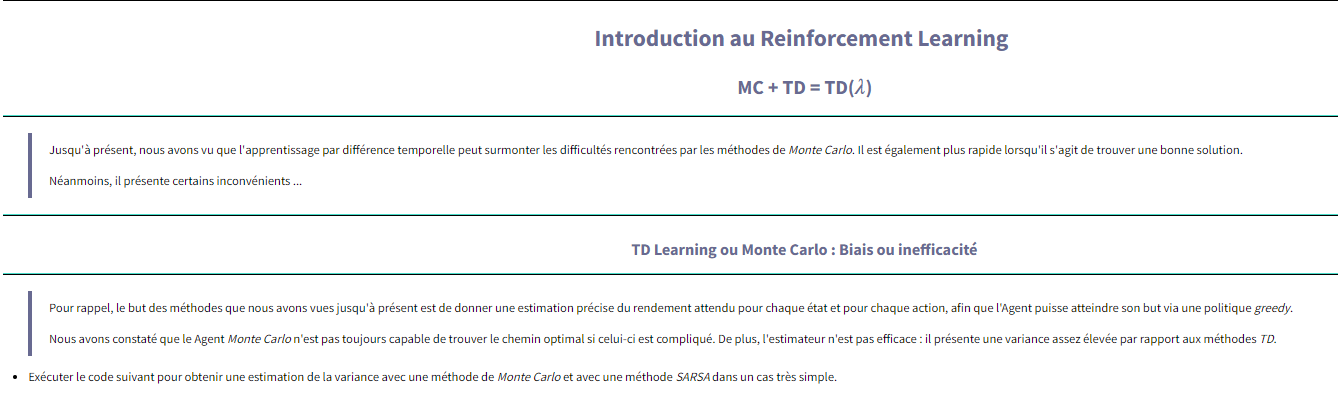

In [ ]:
# importation de numpy et de matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# importation des Agents et des Gridworlds
from gridworld.environments import VanillaGridWorld, GridWorld
from gridworld.agents import Agent, QAgent, MonteCarloAgent, SarsaAgent

sarsa_returns_estimate = []
mc_returns_estimate = []

# génération de 100 Agents SARSA
for _ in range(100):
    # initialisation de la classe SarsaAgent
    sagent = SarsaAgent(prefix='sarsa', grid_size=(6, 6), gold_position=(5, 5), epsilon=.2)
    # initialisation d'une grille 6x6 
    senv = VanillaGridWorld(agent=sagent, grid_size=6)
    # entraînement de l'Agent au cours de 500 episodes
    for j in range(500):
        senv.run_episode(write=False)
    # conservation de la fonction finale Q
    sarsa_returns_estimate.append(senv.agent.Q_function)
    
# génération de 100 Agents MC
for _ in range(100):
    # initialisation de la classe MonteCarloAgent
    mcagent = MonteCarloAgent(prefix='montecarlo', grid_size=(6, 6))
    # initialisation d'une grille 6x6 
    mcenv = VanillaGridWorld(agent=mcagent, grid_size=6)
    # entraînement de l'Agent au cours de 500 episodes
    for j in range(500):
        mcenv.run_episode(write=False)
    # conservation de la fonction finale Q
    mc_returns_estimate.append(mcenv.agent.Q_function)

# calcul des écart-types
sarsa_returns_std = np.std(sarsa_returns_estimate, axis=0).ravel()
mc_returns_std = np.std(mc_returns_estimate, axis=0).ravel()

# calcul des moyennes
sarsa_returns_mean = np.mean(sarsa_returns_estimate, axis=0).ravel()
mc_returns_mean = np.mean(mc_returns_estimate, axis=0).ravel()

# affichage des résultats
plt.figure(figsize=(20, 8))
plt.title('Valeurs moyennes de la fonction Q sur 100 épisodes')
plt.xlabel('Indice de la fonction Q')
plt.ylabel('Valeur de la fonction Q')
plt.plot(range(6*6*4), sarsa_returns_mean, c='navy', label='sarsa')
plt.plot(range(6*6*4), sarsa_returns_mean+sarsa_returns_std, c='navy', alpha=.3)
plt.plot(range(6*6*4), sarsa_returns_mean-sarsa_returns_std, c='navy', alpha=.3)
plt.fill_between(range(6*6*4), y1=sarsa_returns_mean-sarsa_returns_std, y2=sarsa_returns_mean+sarsa_returns_std, color='navy', alpha=.2, label='sarsa deviation')
plt.legend(loc=2)
plt.show()

plt.title('Valeurs moyennes de la fonction Q sur 100 épisodes')
plt.xlabel('Indice de la fonction Q')
plt.ylabel('Valeur de la fonction Q')
plt.figure(figsize=(20, 8))
plt.plot(range(6*6*4), mc_returns_mean, c='red', label='monte-carlo')
plt.plot(range(6*6*4), mc_returns_mean+mc_returns_std, c='red', alpha=.3)
plt.plot(range(6*6*4), mc_returns_mean-mc_returns_std, c='red', alpha=.3)
plt.fill_between(range(6*6*4), y1=mc_returns_mean-mc_returns_std, y2=mc_returns_mean+mc_returns_std, color='red', alpha=.2, label='monte-carlo deviation')
plt.legend(loc=2)
plt.show()

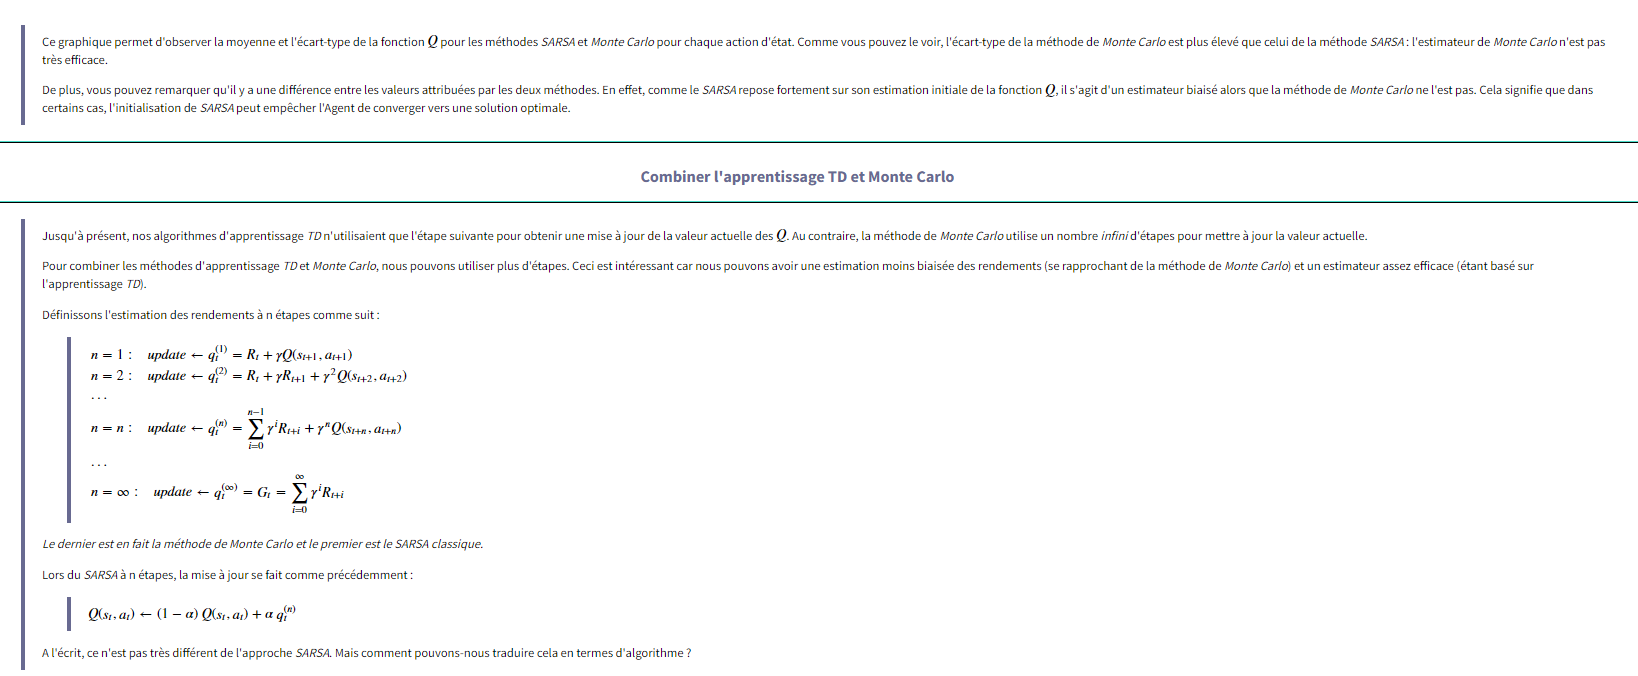

In [ ]:
from IPython.display import HTML
HTML('''<style>
    .pseudo-code-indent {
    margin-left:20px;
    border-left-width: 5px;
    border-left-style: solid;
    border-left-color: #75DFC1;
    padding-left:10px;
    margin-bottom: 10px;
    font-size: 15px;
    font-family: times;
    }
   .pseudo-code-container {
    margin:20px;
    padding:20px;
    border-width:5px;
    border-radius:5px;
    border-color:#40c6a0;
    border-style: solid;
    font-size: 15px;
    font-family: times;
    }
    
</style>''')

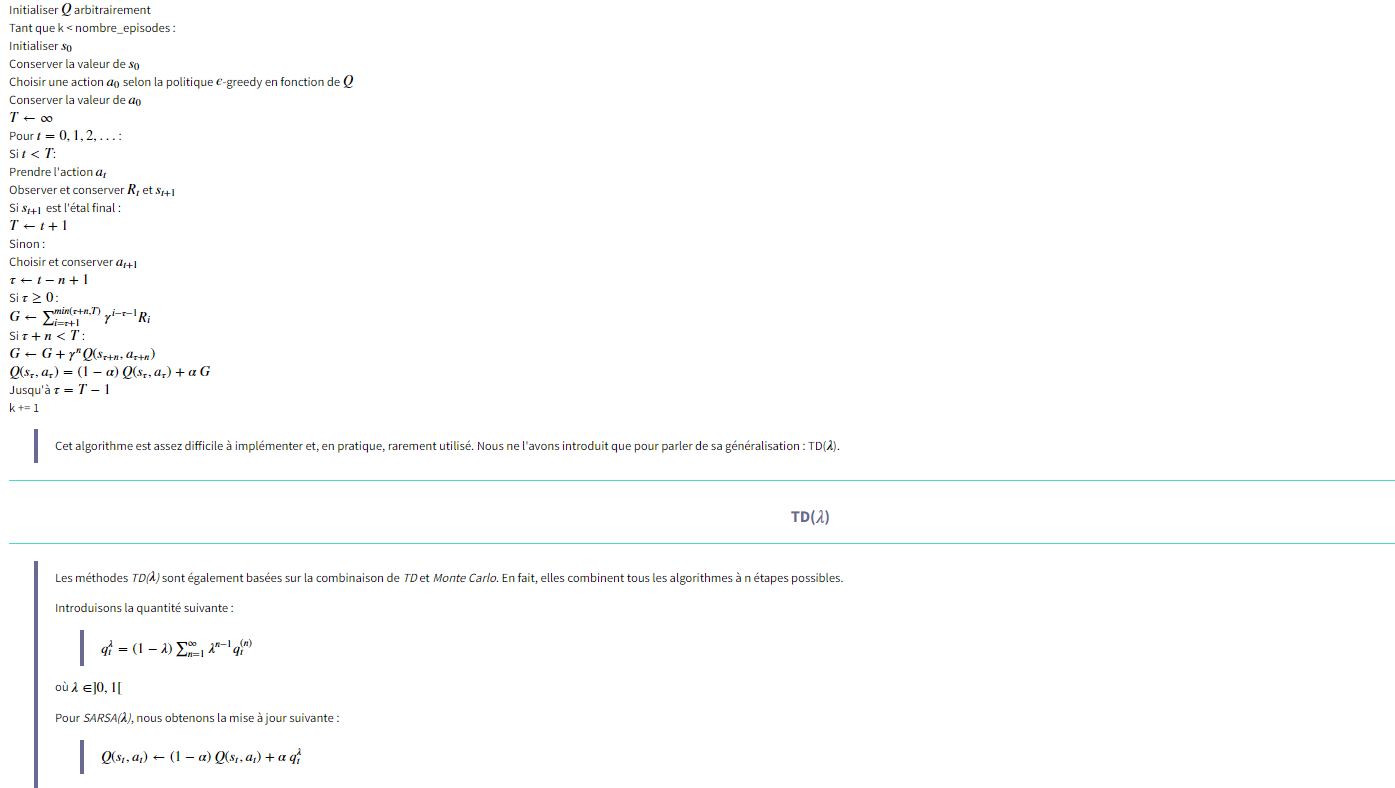

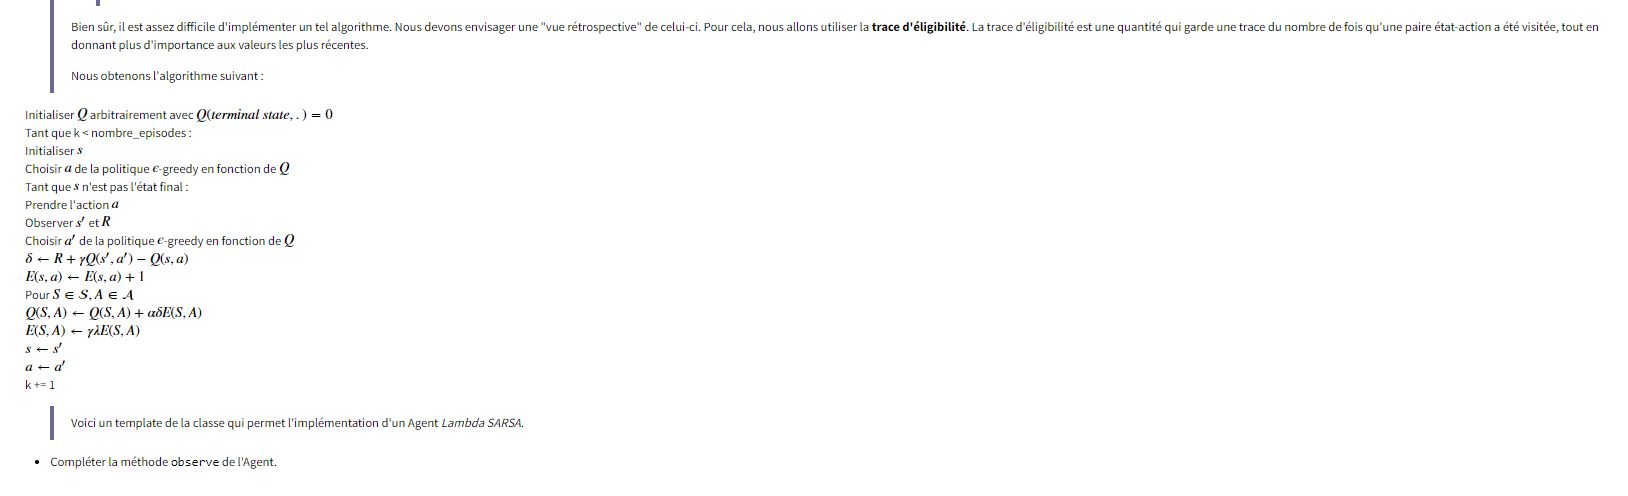

In [ ]:
class SarsaLambdaAgent(Agent):
    def __init__(self, prefix='SARSA-lambda', 
                 grid_size=(10,10), 
                 starting_position=(0, 0), 
                 gold_position = (9,9), 
                 epsilon=0.5, 
                 gamma=.8, 
                 holes_positions=[], 
                 lambda_=.9):

        # préfixe pour nommer les vidéos
        self.prefix = prefix

        # définition de l'ensemble d'actions
        self.set_of_actions = ['up', 'down', 'right', 'left']
        self.number_of_actions = len(self.set_of_actions)

        # position de départ 
        self.starting_position = starting_position

        # initialisation de la matrice Q
        self.Q_function = np.random.uniform(size=(grid_size[0], grid_size[1], self.number_of_actions))

        # attribution d'une valeur nulle pour la valeur Q 
        ## de l'état terminal en raison de la pièce d'or
        self.Q_function[gold_position[0], gold_position[1]] = 0
        ## de l'état terminal en raison des trous
        for hole in holes_positions:
            self.Q_function[hole[0], hole[1]] = 0

        # paramètres SARSA lambda
        self.ALPHA = 1
        self.GAMMA = gamma
        self.EPSILON = epsilon
        self.lambda_ = lambda_
        
        # paramètres d'apprentissage 
        ## actions
        self.current_action = None
        self.previous_action = None
        ## récompenses
        self.current_reward = None
        self.previous_reward = None
        ## position
        self.current_position = self.starting_position
        self.previous_position = None
        
        # initialisation du compteur d'épisodes
        self.step_number = 0
        
        # définition de la trace d'éligibilité
        self.Eligibility = self.Q_function * 0

        pass

    def act(self):
        """
        renvoie une action parmi l'ensemble des actions possibles 
            - suit une politique d'epsilon-greedy 
            - met à jour les paramètres de l'action en cours et de l'action précédente
        """
        
        # mise à jour de l'action précédente
        self.previous_action = self.current_action

         # choix de l'action basée sur une politique epsilon-greedy 
        if np.random.uniform() < self.EPSILON:
            action = np.random.choice(self.set_of_actions)
        else:
            action_index = np.argmax(self.Q_function[self.current_position[0], self.current_position[1]])
            action = self.set_of_actions[action_index]
    
        # mise à jour d'action actuelle
        self.current_action = action
        
        # augmentation du compteur
        self.step_number+=1
        
        # mise à jour de alpha
        self.ALPHA = 1/self.step_number
      
        return action

    def observe(self, agent_position, reward, breeze, smell, end_episode, info):

        # obtention de l'indice A'
        current_action_index = self.set_of_actions.index(self.current_action)

        if self.previous_action is not None:

            # obtention de l'indice A'
            previous_action_index = self.set_of_actions.index(self.previous_action)
            
            # obtention de l'indice Q(S,A)
            q_s_a = self.Q_function[self.previous_position[0], self.previous_position[1], previous_action_index]
            # obtention de l'indice Q(S',A')
            q_sp_ap = self.Q_function[self.current_position[0], self.current_position[1], current_action_index]
            
            # calcul de delta
            delta = self.current_reward + self.GAMMA* q_sp_ap - q_s_a
            
            # mise à jour de la trace d'éligibilité pour S et A
            self.Eligibility[self.previous_position[0], self.previous_position[1], previous_action_index] +=1
            
            # mise à jour de Q pour tout S et A 
            self.Q_function = self.Q_function + self.ALPHA*delta*self.Eligibility
            self.Eligibility = self.GAMMA*self.lambda_*self.Eligibility
            
        # mise à jour des valeurs  
        # de la position précédente
        self.previous_position = self.current_position
        # de la position en cours
        self.current_position = agent_position
        # de la position en cours
        self.previous_reward = self.current_reward
        # de la récompense en cours
        self.current_reward = reward
        
        # mise à jour si l'épisode se termine
        if end_episode:
            
            # calcul de delta
            delta = self.current_reward -\
                    self.Q_function[self.previous_position[0], self.previous_position[1], current_action_index]
            # mise à jour de la trace d'éligibilité pour S et A
            self.Eligibility[self.previous_position[0], self.previous_position[1], current_action_index] +=1
            # mise à jour de Q pour tout S et A
            self.Q_function = self.Q_function + self.ALPHA*delta*self.Eligibility
            self.Eligibility = self.GAMMA*self.lambda_*self.Eligibility
            
        pass

    def reset(self):
        self.previous_action = None
        self.previous_reward = None
        self.previous_position = None
        self.current_action = None
        self.current_reward = None
        self.current_position = self.starting_position
        self.step_number = 1
        self.Eligibility *= 0
        pass

Nous allons à présent vérifier si cet Agent fait les choses de la même manière qu'un Agent SARSA(0) ordinaire.

Instancier un Agent SarsaLambdaAgent, initisaliser un environnement VanillaGridWorld avec cet Agent et entraîner le au cours de 1000 épisodes.
Appeler la méthode display_greedy_episode de l'environnement.

In [ ]:
agent = SarsaLambdaAgent(prefix='lambda-vanilla')

env = VanillaGridWorld(agent)

for i in range(1000):
    env.run_episode(write=False)

env.display_greedy_episode()


Instancier un Agent SarsaLambdaAgent, initisaliser un environnement WindyGridWorld avec cet Agent et entraîner le au cours de 1000 épisodes.
Appeler la méthode display_greedy_episode de l'environnement.

In [ ]:
from gridworld.environments import WindyGridWorld

agent_w = SarsaLambdaAgent(prefix='lambda-wind', 
                           grid_size=(7, 10), 
                           starting_position=(3, 0), 
                           gold_position=(3, 7))
env_w = WindyGridWorld(agent=agent_w)

for i in range(1000):
    env_w.run_episode(write=False)
    
env_w.display_greedy_episode()

Instancier un Agent SarsaLambdaAgent, initisaliser un environnement CliffGridWorld avec cet Agent et entraîner le au cours de 5000 épisodes.
Appeler la méthode display_greedy_episode de l'environnement.

In [ ]:
from gridworld.agents import Agent

class ScriptedAgent(Agent):
    def __init__(self, prefix='scripted', scenario=[]):
        # initialisation de la superclasse
        Agent.__init__(self, prefix)
        
        # conservation du scenario
        self.scenario = scenario
        self.step = 0
        pass

    def act(self):
        action = self.scenario[self.step]
        self.step += 1
        return action
        
    def observe(self, agent_position, reward, breeze, smell, end_episode, info):
        super().observe(agent_position, reward, breeze, smell, end_episode, info)
        pass
    
    def reset(self):
        super()
        self.step = 0
        pass


# définition d'un scénario parfait dans l'exemple de CliffGridWorld
cliff_scenario = ['up']+['right']*11+['down']

# initialisation d'un Agent 'scénarisé'
agent_s = ScriptedAgent(scenario=['up']+['right']*11+['down'])

# initialisation d'un environnement CliffGridWorld avec cet Agent
env_c = CliffGridWorld(agent_s)

# lancement d'un Agent et visualisation de l'épisode
env_c.run_episode()
env_c.display_in_jupyter(width=600, height=200)

Implémenter la classe ScriptedSarsaAgent.

In [ ]:
from gridworld.agents import SarsaAgent

class ScriptedSarsaAgent(SarsaAgent):
    def __init__(self, prefix='SARSA-lambda', 
                 grid_size=(10,10), 
                 starting_position=(0, 0), 
                 gold_position = (9,9), 
                 epsilon=0.5, 
                 gamma=.8, 
                 holes_positions=[],
                 scenario = []):
    
        SarsaAgent.__init__(self, prefix=prefix, 
                            grid_size=grid_size, 
                            starting_position=starting_position, 
                            gold_position=gold_position, 
                            epsilon=epsilon, 
                            gamma=gamma, 
                            holes_positions=holes_positions)
        self.scenario = scenario
        self.ALPHA = .99
        
        self.step_number = 0
        pass
    
    def act(self):
        # mise à jour de l'action précédente
        self.previous_action = self.current_action
        
        # choix de l'action correcte 
        action = self.scenario[self.step_number]
        
        # mise à jour de l'action en cours 
        self.current_action = action
        
        # mise à jour du compteur
        self.step_number+= 1
        
        return action
    
    def observe(self, agent_position, reward, breeze, smell, end_episode, info):
        super().observe(agent_position, reward, breeze, smell, end_episode, info)
        pass
            
    def reset(self):
        super().reset()
        self.step_number = 0
        pass


In [ ]:
Implémenter la classe ScriptedSarsaLambdaAgent.

In [ ]:
class ScriptedSarsaLambdaAgent(SarsaLambdaAgent):
    def __init__(self, prefix='scripted-SARSA-lambda', 
                 grid_size=(10,10), 
                 starting_position=(0, 0), 
                 gold_position = (9,9), 
                 epsilon=0.5, 
                 gamma=.8, 
                 holes_positions=[],
                 scenario = [],
                 lambda_=.9):
    
        SarsaLambdaAgent.__init__(self, prefix=prefix,
                                  grid_size=grid_size, 
                                  starting_position=starting_position, 
                                  gold_position=gold_position, 
                                  epsilon=epsilon, 
                                  gamma=gamma, 
                                  holes_positions=holes_positions, 
                                  lambda_=lambda_)
        self.scenario = scenario
        self.ALPHA = .99
        
        self.step_number = 0
        pass
    
    def act(self):
        # mise à jour de l'action précédente
        self.previous_action = self.current_action
        
        # choix de l'action correcte
        action = self.scenario[self.step_number]
        
        # mise à jour de l'action en cours
        self.current_action = action
        
        # mise à jour du compteur
        self.step_number+= 1
        
        return action
    
    def observe(self, agent_position, reward, breeze, smell, end_episode, info):
        super().observe(agent_position, reward, breeze, smell, end_episode, info)
        pass
        
    def reset(self):
        super().reset()
        self.step_number = 0
        pass


Implémenter la classe ScriptedMonteCarloAgent.

In [ ]:
class ScriptedMonteCarloAgent(MonteCarloAgent):
    def __init__(self, prefix='SARSA-lambda', 
                 grid_size=(10,10), 
                 starting_position=(0, 0), 
                 gold_position = (9,9), 
                 epsilon=0.5, 
                 gamma=.8, 
                 holes_positions=[],
                 scenario = []):
    
        MonteCarloAgent.__init__(self, prefix=prefix,
                                 grid_size=grid_size)
        self.scenario = scenario
        self.ALPHA = .99
        
        self.step_number = 0
        pass
    
    def act(self):
        self.states.append(self.position)
        
        # choix de l'action correcte
        action = self.scenario[self.step_number]
        
        self.actions.append(action)
        
        # mise à jour du compteur
        self.step_number+= 1
        
        return action
    
    def observe(self, agent_position, reward, breeze, smell, end_episode, info):
        super().observe(agent_position, reward, breeze, smell, end_episode, info)
        pass
        
    def reset(self):
        super().reset()
        self.step_number = 0
        pass

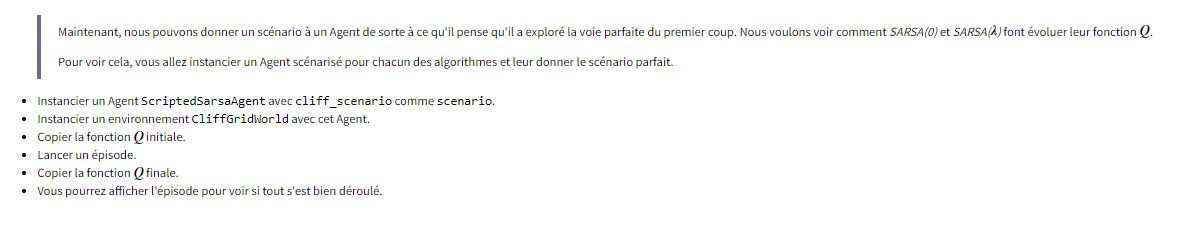

In [ ]:
# initialisation d'un Agent SARSA 'scénarisé'
agent_s = ScriptedSarsaAgent(grid_size=(4, 12), 
                             starting_position=(3, 0),   
                             gold_position = (3, 11),
                             holes_positions = [(3,i) for i in range(1, 11)], 
                             epsilon=.1, 
                             scenario=cliff_scenario)

# initialisation d'un environnement CliffGridWorld
env_c_s = CliffGridWorld(agent_s)

# copie de la fonction Q initiale
Q_init_sarsa = env_c_s.agent.Q_function.copy()

# lancement d'un épisode
env_c_s.run_episode()

# copie de la fonction Q finale
Q_final_sarsa = env_c_s.agent.Q_function.copy()

# affichage d'un épisode
env_c_s.display_in_jupyter()

Instancier un Agent ScriptedSarsaLambdaAgent avec cliff_scenario comme scenario.
Instancier un environnement CliffGridWorld avec cet Agent.
Copier la fonction  Q  initiale.
Lancer un épisode.
Copier la fonction  Q  finale.
Vous pourrez afficher l'épisode pour voir si tout s'est bien déroulé.

In [ ]:
# # initialisation d'un Agent lambda SARSA 'scénarisé'
agent_sl = ScriptedSarsaLambdaAgent(grid_size=(4, 12), 
                                    starting_position=(3, 0),   
                                    gold_position = (3, 11),
                                    holes_positions = [(3,i) for i in range(1, 11)], 
                                    epsilon=.1, 
                                    scenario=cliff_scenario,
                                    lambda_=.9)

# initialisation d'un environnement CliffGridWorld
env_c_sl = CliffGridWorld(agent_sl)

# copie de la fonction Q initiale
Q_init_sarsa_lambda = env_c_sl.agent.Q_function.copy()

# lancement d'un épisode
env_c_sl.run_episode()

# copie de la fonction Q finale
Q_final_sarsa_lambda = env_c_sl.agent.Q_function.copy()

# affichage d'un épisode
env_c_sl.display_in_jupyter()

Instancier un Agent ScriptedMonteCarloAgent avec cliff_scenario comme scenario.
Instancier un environnement CliffGridWorld avec cet Agent.
Copier la fonction  Q  initiale.
Lancer un épisode.
Copier la fonction  Q finale.
Vous pourrez afficher l'épisode pour voir si tout s'est bien déroulé.

In [ ]:
#initialisation d'un Agent MonteCarlo 'scénarisé'
agent_mc = ScriptedMonteCarloAgent(grid_size=(4, 12),
                                   scenario=cliff_scenario)

# initialisation d'un environnement CliffGridWorld
env_c_mc = CliffGridWorld(agent_mc)

# copie de la fonction Q initiale
Q_init_mc = env_c_mc.agent.Q_function.copy()

# lancement d'un épisode
env_c_mc.run_episode()

# réinitialisation de l'environnement
env_c_mc.reset()

# copie de la fonction Q finale
Q_final_mc = env_c_mc.agent.Q_function.copy()

# affichage d'un épisode
env_c_mc.display_in_jupyter()

Nous pouvons maintenant visualiser comment les deux algorithmes ont mis à jour la fonction  Q .

Importer la fonction plot_Q_evolution de gridworld/utils.py

Pour chaque algorithme, appeler la fontion plot_Q_evolution avec comme argument la différence entre les deux fonctions  Q . Vous devrez passer l'ensemble des actions possibles comme valeur de l'argument actions_list.

In [ ]:
from gridworld.utils import plot_Q_evolution

print('SARSA(0)')
plot_Q_evolution(Q_final_sarsa - Q_init_sarsa, env_c_s.agent.set_of_actions)
print('SARSA(lambda)')
plot_Q_evolution(Q_final_sarsa_lambda - Q_init_sarsa_lambda, env_c_sl.agent.set_of_actions)
print('Monte Carlo')
plot_Q_evolution(Q_final_mc - Q_init_mc, env_c_mc.agent.set_of_actions)

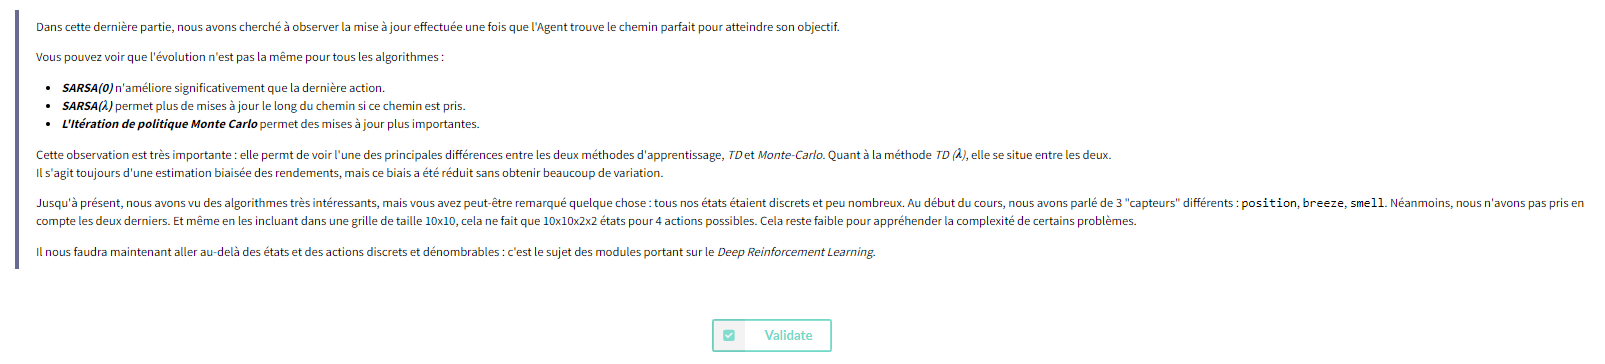